# Project Title: Aviva Insurance Data Analysis ~ Hypothesis Testing and Predictive Modeling 


## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Overview/Objective](#2-data-overviewobjective)
3. [Data Preparation / Descriptive Statistics](#3-data-preparation--descriptive-statistics)  
   - 3a. [Data Preparation](#3a-data-preparation)  
      - 3a.1 [Import Required Libraries](#3a1-import-required-libraries)  
      - 3a.2 [Data Loading and Overview](#3a2-data-loading-and-overview)  
      - 3a.3 [Data Cleaning and Encoding](#3a3-data-cleaning-and-encoding)  
   - 3b. [Descriptive Statistics](#3b-descriptive-statistics)  
      - 3b.1 [Descriptive Statistics](#3b1-descriptive-statistics)  
      - 3b.2 [Correlation Matrix](#3b2-correlation-matrix)  
4. [Hypothesis Testing](#4-hypothesis-testing)  
   - 4.1 [Steps in Hypothesis Testing](#41-steps-in-hypothesis-testing)  
   - 4.2 [Hypothesis 1: BMI and Genders](#42-hypothesis-1-bmi-and-genders)  
   - 4.3 [Hypothesis 2: ANOVA ~ Age vs Charges](#43-hypothesis-2-anova--age-vs-charges)  
   - 4.4 [Hypothesis 3: BMI Impact on Charges](#44-hypothesis-3-bmi-impact-on-charges)  
   - 4.5 [Hypothesis 4: Medical Claims of Smokers vs Non-Smokers](#45-hypothesis-4-medical-claims-of-smokers-vs-non-smokers)  
   - 4.6 [Hypothesis 5: ANOVA Analysis ~ BMI and Number of Children](#46-hypothesis-5-anova-analysis--bmi-and-number-of-children)  
   - 4.7 [Chi-Square Test for Smoking Proportions Across Regions](#47-chi-square-test-for-smoking-proportions-across-regions)  
   - 4.8 [Advanced Predictive Modeling](#48-advanced-predictive-modeling)  
      - 4.8.1 [Elastic Net for Linear Regression with GridSearchCV](#481-elastic-net-for-linear-regression-with-gridsearchcv)  
      - 4.8.2 [Random Forest Regressor with GridSearchCV](#482-random-forest-regressor-with-gridsearchcv)  
      - 4.8.3 [GradientBoostingRegressor with GridSearchCV for Hyperparameter Tuning](#483-gradientboostingregressor-with-gridsearchcv-for-hyperparameter-tuning)  
5. [Conclusion](#5-conclusion)  
6. [Deployment with Streamlit](#6-deployment-with-streamlit)  
7. [Next Steps](#7-next-steps)  

---


## 1. Introduction
This project aims to provide **Aviva** with a robust analysis of factors influencing insurance charges, specifically focusing on demographic and lifestyle attributes like age, number of children, smoking status, and BMI. The process includes in-depth **Exploratory Data Analysis (EDA)**, **Hypothesis Testing** to examine potential statistical relationships, understand trends across groups and provide recommendations for insurance risk assessment, and **Predictive Modeling** to forecast charges based on customer attributes..

---

## 2. Data Overview
The dataset comprises 1,338 entries with attributes such as age, BMI, number of children, smoking status, region, and insurance charges. Key variables include:

- **Age**: Customer's age in years.
- **Gender**: Male or Female.
- **BMI**: Body Mass Index, an indicator of health risk based on weight and height.
- **Smoker**: Whether the customer is a smoker or non-smoker.
- **Region**: Geographic region (e.g., northeast, northwest, southeast, southwest).
- **Charges**: The annual premium charged to the customer.

---

## **Objective**
The primary objectives of this project are as follows::

- **Exploratory Data Analysis**:The exploratory data analysis combined with hypothesis testing focuses on uncovering trends within key variables such as age group distribution, BMI in relation to the number of children, and the smoking proportion across regions.


- **Hypothesis Testing**: To evaluate the effects of various customer attributes on insurance charges and understand which attributes significantly impact risk.
- **Predictive Analysis**: To predict insurance charges based on customer characteristics, enabling Aviva to anticipate costs and make more data-driven underwriting decisions.

- **Insights for Customer Engagement**: To offer insights that can improve customer engagement strategies by identifying risk patterns and tailoring premiums.

## **3. Data Preparation / Descriptive Statistics**
Steps for cleaning, processing, and preparing the data for analysis, including handling missing values and encoding categorical variables.

### **3a.1 Import  required Libraries**

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

---
### **3a.2 Data Loading and Overview**
Explanation: Load and inspect the data to understand its structure and determine which features are available for analysis.

In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('Aviva_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3a.3 Data Cleaning and Encoding
Explanation: Clean the dataset and encode categorical variables (sex, smoker status, region) into numerical values for further analysis.

In [11]:
# lets copy data for encoding
data_copy = data.copy()
data_copy

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    label_encoders[column] = LabelEncoder()
    data_copy[column] = label_encoders[column].fit_transform(data_copy[column])

### 3b.1 Descriptive Statistics
We generate descriptive statistics to gain insights into the dataset, focusing on attributes such as age, BMI, and insurance charges.



In [13]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


The describe() function provides the statistical information about the numeric variables.

### 3b.2 Correlation Matrix
A correlation matrix to visualize relationships between variables and identify factors that correlate strongly with insurance charges.

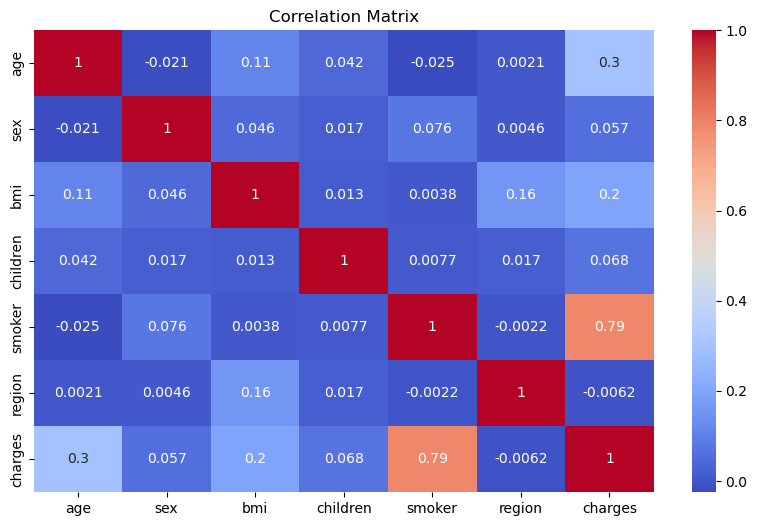

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


According to the brief preview of our data, we will define the 'charges' to be our response variable, and 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' to be our predictor variables. In this lab, we will test how our predictor variables influence the insurance 'charges'.

The correlation matrix reveals:

- **Smoker and Charges**: Strong positive correlation (0.79), indicating smokers tend to incur higher insurance charges due to health risks.
  
- **Age and Charges**: Moderate positive correlation (0.3), suggesting older individuals generally face higher charges, likely due to age-related health risks.

- **BMI and Charges**: Moderate positive correlation (0.2), implying that higher BMI may lead to increased charges because of associated health conditions.

- **Low/No Correlation**: Sex, children, and region show minimal correlation with charges, indicating limited impact.

- **Independent Variables**: Age, sex, BMI, children, smoker, and region have low inter-correlations, providing unique predictive information.

**Summary**: Smoker status, age, and BMI are the primary factors influencing charges, with smoking having the greatest effect.


## 4. Hypothesis Testing
Hypothesis testing is used here to determine the statistical significance of customer attributes on insurance charges. These tests will help Aviva make data-driven decisions when assessing customer risks.

### 4.1 Steps in Hypothesis Testing


1. **Choose a Sample Statistic**  
   In hypothesis testing, we compare sample statistics across groups. Let 𝜇₁ be the mean BMI for males and 𝜇₂ for females. We will compare these means, 𝜇₁ and 𝜇₂, statistically.

2. **Define Hypotheses (Null and Alternative)**  
   Define both the null and alternative hypotheses:
   - **Null Hypothesis (𝐻₀)**: 𝜇₁ − 𝜇₂ = 0 (No difference in BMI between males and females).
   - **Alternative Hypothesis (𝐻ₐ)**: 𝜇₁ − 𝜇₂ ≠ 0 (There is a difference in BMI between males and females).  
   This is a two-tailed test as we are testing for any difference, not a specific direction.

3. **Set the Decision Criteria**  
   Select a significance level (𝛼), commonly 0.05 (5%). For a two-tailed test, divide 𝛼 by 2 (0.025 per tail).
4. **Evaluate and interpret the result**
   If the p-value is less than 𝛼, we reject 𝐻₀.
   if the p-value is greater than 𝛼, we fail to reject  𝐻₀


   We can use various statistical tests to evaluate results based on our data and sample size:

   - **t-test**: For comparing means when the sample size is small (n < 30) and standard deviation is unknown.
   - **z-test**: For large samples (n ≥ 30) or when population standard deviation is known, used to test mean or proportion differences.
   - **f-test**: Compares variances between two populations, forming the basis for ANOVA.
   - **Chi-squared test**: Tests the difference between expected and observed frequencies in categorical data, typically in contingency tables.
   - **A contingency table**: is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), [z-score](), [f-score](https://en.wikipedia.org/wiki/F-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) statistics and [contingency tables](https://en.wikipedia.org/wiki/Contingency_table?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), please visit their corresponding wikipedia links.


---

## Note
- We had earlier made a copied version of our dataset, so we have 'data' and 'data_copy' and will be used interchangeably depending on the need i.e strings/numeric
- Females and Males in 'data' were already encoded earlier as: female = 0  and male = 1
- In the previous correlation Matrix result Sex, children, and region show minimal correlation with charges, indicating limited impact. We will attest to that using hypothesis testing


## 4.2. BMI and Genders


- **Null Hypothesis (H0)**: There is no significant difference in the BMI of females and males.
- **Alternative Hypothesis (H1)**: There is a significant difference in the BMI of females and males.

#### Separate BMI by sex 
First, let's get all observations for sex


In [15]:
import scipy.stats as stats

# Separate BMI by sex
bmi_female = data_copy[data_copy['sex'] == 0]['bmi']
bmi_male = data_copy[data_copy['sex'] == 1]['bmi']

#### Now, we will plot the distribution of 'bmi' values for females and males using seaborn's `kdeplot()` function.


<Axes: xlabel='bmi', ylabel='Density'>

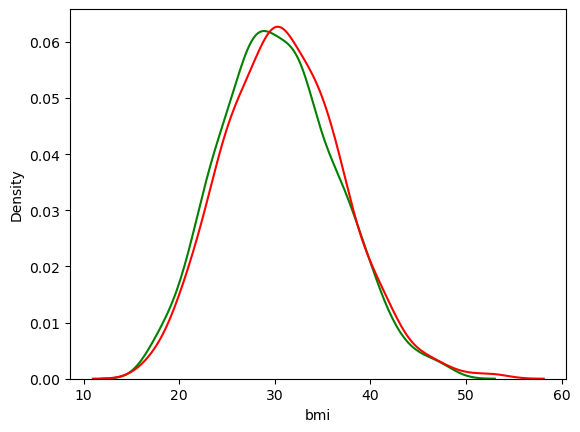

In [16]:
sns.kdeplot(bmi_female, color='green', label='Female BMI')
sns.kdeplot(bmi_male, color='red', label='Male BMI')

From the graph, we already see that the two distributions are very similar.

In [17]:
bmi_female.mean()

30.37774924471299

In [18]:
bmi_male.mean()

30.943128698224854

- Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.
- Although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.


In [19]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(bmi_female, bmi_male)

# Conclusion
if p_value < 0.05:
    result = "Reject the null hypothesis: Significant difference in BMI between genders."
else:
    result = "Fail to reject the null hypothesis: No significant difference in BMI between genders."

f'T-statisitics: {t_stat}, P-value: { p_value}', result


('T-statisitics: -1.696752635752224, P-value: 0.08997637178984932',
 'Fail to reject the null hypothesis: No significant difference in BMI between genders.')

### Conclusion: 

 We fail to reject the null hypothesis and can conclude that there is no significant difference in BMI between genders, suggesting that gender may not be a critical factor in risk assessment based on BMI alone

## 4.3 ANOVA~ Age vs  Charges 

### Firstly, let's visualize the distribution of age according to charges and smoker

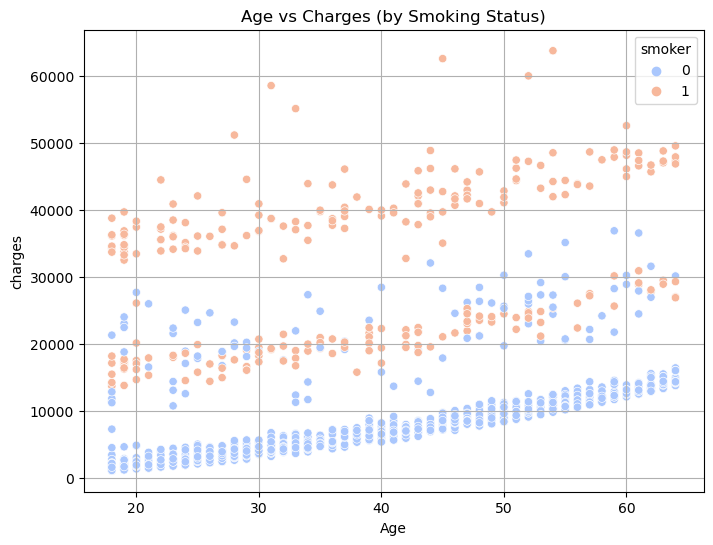

In [20]:
# Scatter Plot: Age vs Charges

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_copy, x='age', y='charges', hue='smoker', palette='coolwarm')
plt.title('Age vs Charges (by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('charges')
plt.legend(title='smoker')
plt.grid()
plt.show()

# Insight:
# This scatter plot shows the relationship between age and insurance charges, with colors indicating smoking status.
# It can help Aviva's team identify any trend in charges with increasing age, as well as the influence of smoking on charges.


### Insight:
- The above scatter plot displays the relationship between age and insurance charges, categorized by smoking status.
- Smokers, represented by blue markers, tend to incur higher charges compared to non-smokers (orange markers) at any given age. 
- Notably, charges for smokers show greater variability and increase with age, suggesting that smoking status significantly impacts insurance charges, especially as age progresses.
- Non-smokers, while showing a slight upward trend in charges with age, generally incur lower charges across all age groups. This insight suggests that smoking is a major factor influencing higher insurance costs, particularly in older age groups.

### Visualization of  Smokers by Age

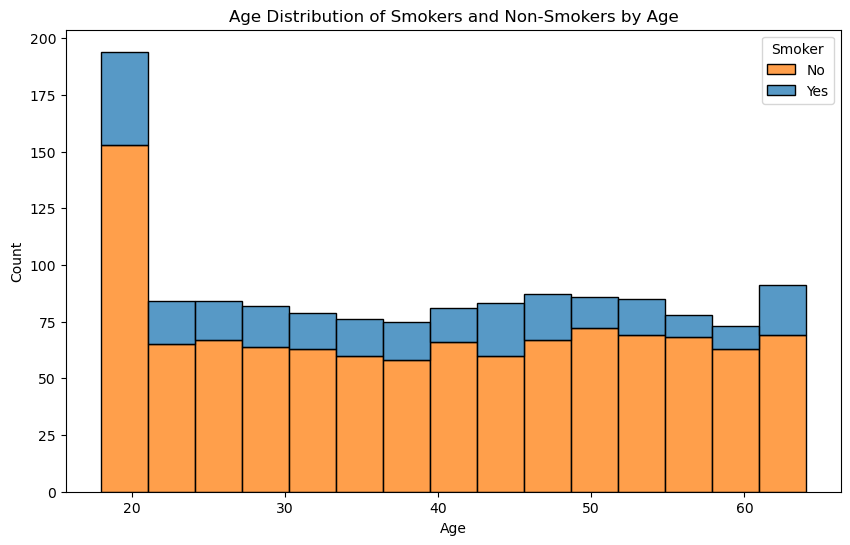

In [21]:
# 3. Smokers by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='smoker', multiple='stack', bins=15)
plt.title('Age Distribution of Smokers and Non-Smokers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.show()

### Insight:

- The histogram above shows the age distribution of smokers (blue) and non-smokers (orange). 
- The highest concentration of smokers and non-smokers is in the youngest age group (under 20). As age increases, the proportion of smokers generally decreases, while the distribution of non-smokers remains relatively stable across different age groups. 
- This pattern might reflect an increased awareness of smoking risks or lifestyle changes as individuals age. The histogram suggests that younger individuals have a higher smoking rate, which may contribute to higher charges for smokers observed in the previous plots.



## Hypothesis
- Null Hypothesis (H0): There is a significant difference in charges across age groups
- Alternative Hypothesis (H1): There is a no significant difference in charges across age groups.


- We divided the ages into groups to test for significant differences in insurance charges across these groups using ANOVA.
- The if-statement ensures that each age group has entries before performing the test, preventing NaN results.
- A low p-value (< 0.05) from the ANOVA test indicates significant differences in charges between at least two age groups.
- If the p-value is high, it suggests that age may not significantly affect insurance charges within this dataset.


In [22]:

# Step 1: Creating age groups for comparison
data['age_group'] = pd.cut(
    data['age'], 
    bins=[18, 30, 45, 60, 75], 
    labels=['18-30', '31-45', '46-60', '61-75']
)

# Step 2: Checking if any age group is empty before ANOVA
age_groups = ['18-30', '31-45', '46-60', '61-75']
if all(data[data['age_group'] == group].shape[0] > 0 for group in age_groups):
    # Step 3: Performing ANOVA test
    anova_result = stats.f_oneway(
        data[data['age_group'] == '18-30']['charges'],
        data[data['age_group'] == '31-45']['charges'],
        data[data['age_group'] == '46-60']['charges'],
        data[data['age_group'] == '61-75']['charges']
    )
    print("ANOVA test result for Age impact on charges:", anova_result)

    # Step 4: Insight based on p-value
    if anova_result.pvalue < 0.05:
        print("Insight: There is a significant difference in charges across age groups.")
    else:
        print("Insight: There is no significant difference in charges across age groups.")
else:
    print("ANOVA test cannot be performed as one or more age groups are empty.")

ANOVA test result for Age impact on charges: F_onewayResult(statistic=33.87851147690378, pvalue=4.624485236835804e-21)
Insight: There is a significant difference in charges across age groups.


## 4.4 BMI impact on charges.

### Visualization of  BMI and charges by smokers:
A scatter plot with a regression line for both smokers and non-smokers can help visualize the relationship between BMI and charges, providing an intuitive sense of whether smokers are incurring higher charges than non-smokers.


C:\Users\Tolu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

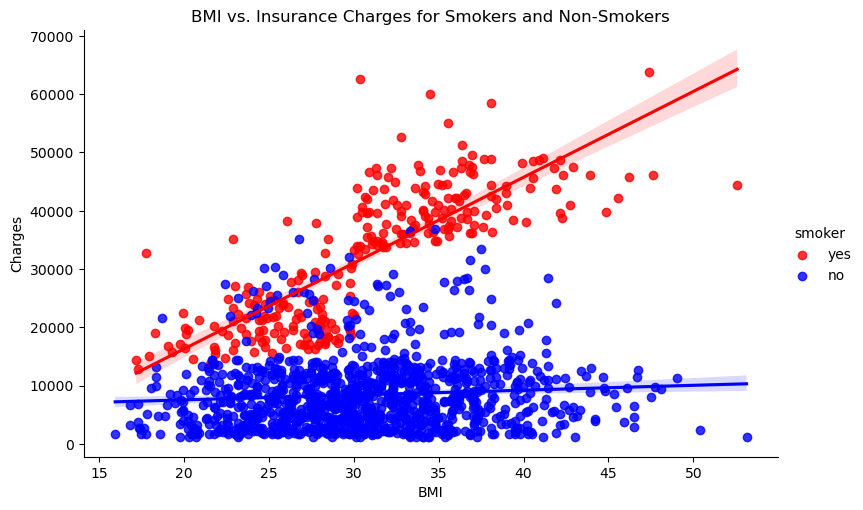

In [23]:
# Scatter plot with regression lines for smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data, aspect=1.6, palette={'yes': 'red', 'no': 'blue'})
plt.title("BMI vs. Insurance Charges for Smokers and Non-Smokers")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


### Insight:
- This scatter plot, with trend lines, shows the relationship between BMI and insurance charges, again separated by smoking status. 
- Smokers (red) exhibit a positive correlation between BMI and charges, indicating that higher BMI is associated with higher charges for smokers. 
- In contrast, non-smokers (blue) show a relatively flat trend line, suggesting that BMI has minimal impact on charges for non-smokers. 
- The strong upward trend for smokers implies that individuals with higher BMI who smoke incur significantly higher insurance charges, possibly due to the compounded health risks associated with both high BMI and smoking.



### Hypotheses:


- Null Hypothesis (H0): High BMI does not correlate with increased charges.
- Alternative Hypothesis (H1): High BMI correlates with increased charges.

In [24]:
# Pearson Correlation Test for BMI and Charges
bmi_corr, bmi_pvalue = stats.pearsonr(data['bmi'], data['charges'])
if bmi_pvalue < 0.05:
    print("BMI Impact Result: High BMI correlates with increased charges (reject H0).")
else:
    print("BMI Impact Result: No significant correlation between BMI and charges (fail to reject H0).")

BMI Impact Result: High BMI correlates with increased charges (reject H0).


--- 

## 4.5 Hypothesis 5: Medical Claims of Smokers vs Non-Smokers


- Based on the high Correlation between Smokers and Charges , we would like to prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.
---
- We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.

In [25]:
# Separate claims by smoking status
claims_smoker = data_copy[data_copy['smoker'] == 1]['charges']
claims_nonsmoker = data_copy[data_copy['smoker'] == 0]['charges']

In [26]:
claims_smoker.mean()

32050.23183153284

In [27]:
claims_nonsmoker.mean()

8434.268297856204

### State the null and the alternative hypothesis
- Null Hypothesis $ 𝐻_{0}:\mu_{1}<=\mu_{2} $ : The average charges (medical claims) of smokers are less than or equal to nonsmokers.
- Alternative Hypothesis $ 𝐻_{A}:\mu_{1}>\mu_{2} $: The average charges (medical claims) of smokers are greater or  equal to non-smokers.

The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.


Now, let's plot our smoking versus nonsmoking populations by using *seaborn* `boxplot()` function. It is always useful to have a visual representation of the data that we are working with.


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

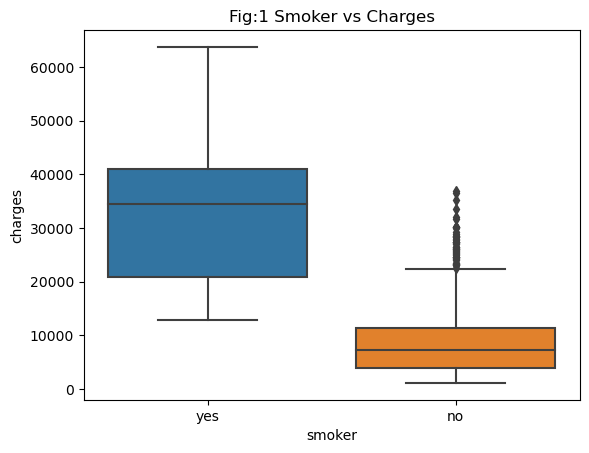

In [28]:
sns.boxplot(x=data.smoker,y=data.charges,data=data).set(title="Fig:1 Smoker vs Charges")

### Insight: Smokers by Age


#### Interpretation of Smoker vs. Charges Box Plot

#### Smokers (Yes)
- The box plot for smokers shows a much higher range of charges compared to non-smokers.
- The median charge for smokers is significantly higher, located near the upper half of the box.
- The interquartile range (IQR) for smokers is quite large, indicating a wide variability in charges.
- Smokers' charges also extend further to the maximum range, suggesting that the highest costs are incurred by smokers.

#### Non-Smokers (No)
- Non-smokers have a lower median charge, with the box plot showing that the central 50% of their charges fall within a narrower range.
- There are several outliers above the main distribution for non-smokers, but these values are still considerably lower than the typical charges for smokers.
- The lower maximum and narrower spread suggest that non-smokers generally incur lower charges compared to smokers.

#### Summary
This plot highlights a strong association between smoking status and charges, where smokers tend to have much higher charges on average than non-smokers. This could indicate that smoking is associated with higher health or insurance costs(charges).


Now, we will calculate t-value and p-value of charges for smoking and nonsmoking populations.


In [29]:
### Perform t-test
t_stat_claims, p_value_claims = stats.ttest_ind(claims_smoker, claims_nonsmoker)

# Conclusion
if p_value_claims < 0.05:
    result_claims = "Reject the null hypothesis that average charges (medical claims) for smokers are less than or equal to nonsmokers."
else:
    result_claims = "Failed to reject the null hypothesis that average charges for smokers are less than or equal to nonsmokers."

t_stat_claims, p_value_claims, result_claims
f'T-statisitics: {t_stat_claims}, P-value: { p_value_claims},Result: { result_claims}'


'T-statisitics: 46.66492117272371, P-value: 8.271435842179102e-283,Result: Reject the null hypothesis that average charges (medical claims) for smokers are less than or equal to nonsmokers.'

### Conclusion: 
Smokers have significantly higher medical claims than non-smokers, indicating that smoking status is a critical factor in risk assessment.

### Hypohesis 3: Anova analysis:
For comaparison of  the BMI of women with no children, one child, and two children using statical evidence. 
Aim is to examine whether there is a statistically significant difference in BMI across groups with different numbers of children (0, 1, or 2)

- Null Hypothesis $ 𝐻_{0}:\mu_{1}<=\mu_{2} $ : The mean BMI of women with no children , one child, and two children are the same.
- Alternative Hypothesis $ 𝐻_{A}:\mu_{1}>\mu_{2} $: At least one of the means for women's BMI is not the same.

For these test, we will use a one-way ANOVA and f-score statistic to evaluate the variances of these three different populations. We will set alpha value to be 0.05.

First, we need to filter data for women with 0, 1 and 2 children.

In [30]:
# Get observations for female
female = data[data['sex'] == 'female']
female

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.90,0,yes,southwest,16884.92400,18-30
5,31,female,25.74,0,no,southeast,3756.62160,31-45
6,46,female,33.44,1,no,southeast,8240.58960,46-60
7,37,female,27.74,3,no,northwest,7281.50560,31-45
9,60,female,25.84,0,no,northwest,28923.13692,46-60
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500,46-60
1334,18,female,31.92,0,no,northeast,2205.98080,NaN
1335,18,female,36.85,0,no,southeast,1629.83350,NaN
1336,21,female,25.80,0,no,southwest,2007.94500,18-30


In [31]:
# Filter for female rows with children <= 2 and make a copy to avoid SettingWithCopyWarning
female_children = female[female['children'] <= 2]

We will use `groupby()` function to group the information by the number of children and bmi values.

In [32]:
# Now group by children and calculate the mean BMI
female_children.groupby('children')['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

### Boxplots to visualize the difference in BMI values between these 3 groups.

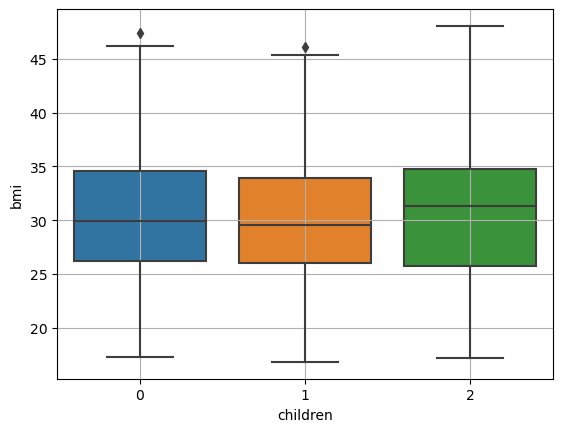

In [33]:
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

### Interpretation of BMI vs. Number of Children Box Plot

- **Children = 0**:
  - The BMI values for individuals without children have a relatively wide interquartile range, indicating moderate variability.
  - The median BMI is around 30.
  - There are a few outliers above 45, indicating some individuals with higher-than-average BMI.

- **Children = 1**:
  - The BMI distribution for individuals with one child is similar to those with no children, with a slightly narrower interquartile range.
  - The median BMI is also around 30.
  - Like the zero-children group, this category has a few outliers, but the values are close to the overall range.

- **Children = 2**:
  - Individuals with two children have a similar median BMI, around 30, and the interquartile range is comparable to those with fewer children.
  - The maximum BMI in this group is slightly higher than those with zero or one child, although there are no extreme outliers.

### Summary
Across all groups (0, 1, or 2 children), the median BMI is consistent, indicating that BMI does not vary significantly with the number of children. However, individuals with more children (2) tend to have a slightly higher upper range in BMI, while the variability remains generally consistent across all groups.


Now, we will construct the ANOVA table and check for each groups count (0,1,2 children) against the bmi values. We will use the ols (ordinary least squares) model for estimation of the unknown parameters. To learn more about OLS, please visit this wikipedia [link](https://en.wikipedia.org/wiki/Ordinary_least_squares?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


## 4.6 ANOVA Analysis: BMI and Number of Children

The ANOVA (Analysis of Variance) table is used to analyze the differences between the means of three or more groups. Here, it examines whether there is a statistically significant difference in BMI across groups with different numbers of children (0, 1, or 2). Below is a breakdown of the results and their interpretation.

##  Formula and Model
- The formula `bmi ~ C(children)` specifies that we are using BMI as the dependent variable and treating `children` as a categorical (factor) variable.
- The model is built using the **Ordinary Least Squares (OLS)** method, which estimates the parameters for the ANOVA.

## ANOVA Table Components

### `C(children)` Row
- **Degrees of Freedom (df)**: There are 2 degrees of freedom for `children`, indicating three groups (0, 1, 2 children) minus one (k-1 = 3-1).
- **Sum of Squares (sum_sq)**: The sum of squares for `children` is 24.59, representing the total variation in BMI explained by the number of children.
- **Mean Square (mean_sq)**: This is the average variation, calculated as `sum_sq` divided by `df`, resulting in 12.30.
- **F-statistic (F)**: The F-value is 0.33, which helps determine if the means between groups are significantly different.
- **p-value (PR(>F))**: The p-value is 0.716, which is higher than common significance levels (e.g., 0.05). This suggests that there is no statistically significant difference in BMI across the three groups.

### Residual Row
- **Degrees of Freedom (df)**: The degrees of freedom for the residuals is 563, representing the total number of observations minus the number of groups (n-k).
- **Sum of Squares (sum_sq)**: The residual sum of squares is 20,695.66, indicating the variability within the groups.
- **Mean Square (mean_sq)**: The residual mean square is 36.76, representing the average variation within groups.

In [34]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


##  Interpretation of Results
- **P-value (0.716)**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests that the number of children does not have a significant impact on BMI.
  
## Conclusion
The ANOVA results indicate that there is no significant difference in BMI between groups with different numbers of children (0, 1, or 2). This suggests that the mean BMI for individuals with no children, one child, and two children is statistically similar in this analysis.


### 4.7 Chi-Square Test for Smoking Proportions Across Regions
- Null Hypothesis $ 𝐻_{0} $:  Smokers proportions are not significantly different across the different regions.
- Alternative Hypothesis $ 𝐻_{A} $: Smokers proportions are different across the different regions.



Here, we are comparing two different categorical variables, smokers/nonsmokers and different regions. For this type of analysis, we will perform a chi-square test.


First, we will calculate a contingency table between the proportions of smokers in different regions. For this, we will use *pandas* `crosstab()` function.


In [35]:
# Create a contingency table
contingency_table = pd.crosstab(data['region'], data['smoker'])
contingency_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Next, let's plot the distribution of nonsmokers/smokers across 4 different regions using the `plot()` function.


<Axes: xlabel='region'>

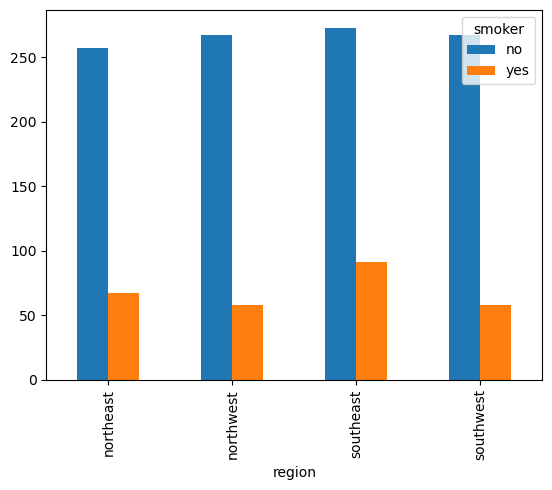

In [36]:
# 1. Smokers by Region
contingency_table.plot(kind='bar')

## Interpretation of Smoker Distribution Across Regions

## Key Observations

1. **Smoker vs. Non-Smoker Distribution**:
   - Non-smokers (blue bars) significantly outnumber smokers (orange bars) in every region.
   - This consistent trend may imply that the overall population has fewer smokers.

2. **Potential Relationship with BMI**:
   - In relation to the previous BMI analysis, smoking could be an important factor to consider, as smoking affects health and might influence BMI.
   - Analyzing BMI by smoking status and region could reveal differences in health outcomes, potentially indicating higher BMI levels among smokers.

3. **Consistency Across Regions**:
   - The similar smoker-to-non-smoker ratio across regions suggests that smoking habits are evenly distributed and regional variations in BMI might be influenced by other factors (e.g., diet or socioeconomic status) rather than smoking alone.

## Summary
The chart highlights that non-smokers dominate in each region, reinforcing that smoking status might not be a primary regional factor for BMI differences. However, it remains an important variable for understanding overall health patterns.


---

Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.


In [37]:
# Perform Chi-Square test
chi2, p_val, dof, expected_freq = chi2_contingency(contingency_table, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, expected_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [38]:
# Enter your code and run the cell
if (p_val < 0.05):
    print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
    print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions


### Conclusion:
We failed to reject that the proportions of smokers are not significantly different across different regions. Therefore, the proportions of smokers are different across different regions.



--- 

## 4.8 Advanced Predictive Modeling
This section focuses on building predictive models to determine two primary outcomes

- Charges Prediction
Predicting the insurance charges based on customer attributes.


For each prediction goal, we will apply feature engineering, perform hyperparameter tuning, and evaluate model performance using error metrics.

### 4.8.1 Elastic Net for linear regression with GridSearchCV
Elastic Net combines the penalties of both Lasso (L1) and Ridge (L2) regression, making it a robust choice when there are multiple features with potentially correlated predictors.

### Import required libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('Aviva_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Define features and target variable


In [3]:
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

In [4]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


 ### Apply label encoding for categorical features, if any


In [6]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [7]:
#checking encoded X
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


### Split data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Scale the data


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ElasticNet model


In [10]:
elastic_net = ElasticNet(random_state=42)

### Define a parameter grid for GridSearchCV

In [11]:
param_grid = {
    'alpha': np.logspace(-3, 1, 10),       # Alpha values from 0.001 to 10
    'l1_ratio': np.linspace(0, 1, 10),     # L1 ratio from 0 (Ridge) to 1 (Lasso)
    'max_iter': [1000, 5000, 10000]        # Increasing max iterations for potential convergence improvements
}

#### Initialize GridSearchCV with cross-validation

In [12]:
grid_search = GridSearchCV(estimator=elastic_net, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)


### Fit the model

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [1000, 5000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

### Save model in pickle for easy call up in the future

In [15]:
import pickle as pk
pk.dump(grid_search,open('Elasticnet.pkl','wb'))

### Load model from pickle


In [16]:
import pickle as pk
grid_search =pk.load(open('Elasticnet.pkl','rb'))
grid_search

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [1000, 5000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

### Get the best model and parameters

In [17]:
best_elastic_net = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 10.0, 'l1_ratio': 1.0, 'max_iter': 1000}


### Predict on the test set and compare with Actual value

In [18]:
# Make predictions on test set
Enet_ypred = best_elastic_net.predict(X_test)
ENet1_comparison = pd.DataFrame({'ElasticNet1:':"",
        'Actual':y_test,
    'predicted':Enet_ypred
})
ENet1_comparison.head()

,ElasticNet1:,Actual,predicted
764,,9095.06825,8903.670299
887,,5272.17580,7118.442080
890,,29330.98315,36872.437295
1293,,9301.89355,9507.230587
259,,33750.29180,27014.418518


### Calculate and print error metrics

In [19]:
mae =mean_absolute_error(y_test, Enet_ypred)
mse = mean_squared_error(y_test, Enet_ypred)
r2 = r2_score(y_test, Enet_ypred)
elastic_old = {'Model':'ElasticNet',
               'MAE': mae,
               'MSE': mse,
               'R2 Score': r2}
elastic_old

{'Model': 'ElasticNet',
 'MAE': 4187.514550174317,
 'MSE': 33661029.237716824,
 'R2 Score': 0.7831800046656066}

### 4.8.2 Random Forest Regressor with GridSearchCV


In [20]:
# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [21]:
# Apply GridSearchCV to find the best parameters for Random Forest
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [22]:
#save model for future use
pk.dump(grid_search_rf,open('Rforest.pkl','wb'))

In [23]:
#load model
grid_search_rf =pk.load(open('Rforest.pkl','rb'))

In [24]:
# Use best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

In [25]:
# Make predictions on test set and compare wit actual values
y_pred_rf = best_rf_model.predict(X_test)
RF_comparison = pd.DataFrame({'RandomClassifier:':"",
        'Actual':y_test,
    'predicted':y_pred_rf
})
RF_comparison.head()

,RandomClassifier:,Actual,predicted
764,,9095.06825,10349.738743
887,,5272.17580,5205.052607
890,,29330.98315,27333.516148
1293,,9301.89355,9793.227702
259,,33750.29180,34840.228830


In [26]:
# Predictions and error metrics
y_pred_rf = best_rf_model.predict(X_test)
RF_results = {
    'Model': 'Random Forest Regressor',
    'R2 Score': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf)
}

In [27]:
RF_results

{'Model': 'Random Forest Regressor',
 'R2 Score': 0.8681090921359358,
 'MAE': 2532.2924700899734,
 'MSE': 20475896.141194336}

### 4.8.3 GradientBoostingRegressor with GridSearchCV for hyperparameter tuning

In [128]:
# Needed libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [129]:
# Define features (X) and target variable (y)
X0 = data2.drop('charges', axis=1)  # Features (excluding the target column)
y0 = data2['charges']  # Target variable

In [130]:
# Column definitions
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [131]:
# Split the dataset into training and testing sets
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [132]:
# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values
            ('scaler', StandardScaler())  # StandardScaler for numerical features
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder for categorical features
        ]), categorical_features)
    ]
)

# Define the pipeline: Preprocessing + GradientBoostingRegressor
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [133]:
# Define the pipeline: Preprocessing + GradientBoostingRegressor
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [135]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [136]:
# Initialize GridSearchCV
grid_search_gb = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


In [137]:
#fit model to data
grid_search_gb.fit(X_train0, y_train0)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\Tolu\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.05, 0.1],
                         'regressor__max_depth': [3, 4, 5],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [138]:
# Get the best model from GridSearchCV
best_gb_model = grid_search_gb.best_estimator_
best_gb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           min_samples_leaf=4,
                                           min_samples_split=10))])

In [149]:
# Save model in picle for easy call up in the future
import pickle as pk
pk.dump(best_gb_model ,open('gbr_pipeline.pkl','wb'))

In [150]:
#load model from pickle
import pickle as pk
best_gb_model =pk.load(open('gbr_pipeline.pkl','rb'))

In [144]:
# Make predictions on test set and compare with actual value
y_pred_gb = best_gb_model.predict(X_test0)
GB_comparison = pd.DataFrame({'GBClassifier:':"",
        'Actual':y_test0,
    'predicted':y_pred_gb
})
GB_comparison.head()

,GBClassifier:,Actual,predicted
764,,9095.06825,10522.251354
887,,5272.17580,6079.581603
890,,29330.98315,27703.648974
1293,,9301.89355,9947.675901
259,,33750.29180,34438.483687


In [145]:
# Calculate error metrics
GBR_result = { 'Model': 'GradientBoostRegressor',
           'MSE' : mean_squared_error(y_test0, y_pred_gb),
           'MAE': mean_absolute_error(y_test0, y_pred_gb),
           'R2 Score' : r2_score(y_test0, y_pred_gb)}
GBR_result

{'Model': 'GradientBoostRegressor',
 'MSE': 18553354.348406292,
 'MAE': 2460.1178951666066,
 'R2 Score': 0.8804927153341061}

--- 

### Regularised ElasticNet model  with Polynomial features.

### Pipeline Structure
Firstly, we will create a pipeline that applies the `StandardScaler`, then the `PolynomialFeatures`, followed by the `ElasticNet` model.

### Parameter Grid
Then we will define a grid of hyperparameters for `GridSearchCV` to search over, which can include parameters for `ElasticNet`, such as `alpha`, `l1_ratio`, and the degree of the `PolynomialFeatures`.

### GridSearchCV Setup
Lastly we will fit the `GridSearchCV` on my dataset, and it will automatically handle cross-validation and hyperparameter tuning across the pipeline.


In [46]:
# Import necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [47]:
# Load the data
data2 = pd.read_csv('Aviva_insurance.csv')

In [48]:
# Define features (X) and target variable (y)
X2 = data2.drop('charges', axis=1)  # Features (excluding the target column)
y2 = data2['charges']  # Target variable

In [49]:
# Column definitions
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [50]:
# Split the dataset into training and testing sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [51]:
# Column definitions
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [52]:
# Define the transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # StandardScaler for numerical features
        ]), numerical_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
            ('encoder', OneHotEncoder())  # Use LabelEncoder for categorical features
        ]), categorical_features)
    ])


In [53]:
# Full pipeline: Preprocessing + Model (ElasticNet)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(include_bias=False)),  # Step 2: Polynomial Features
    ('model', ElasticNet(tol = 0.2))  # Step 3: ElasticNet Model
])

In [54]:
# Define the parameter grid to search
param_grid = {
    'poly__degree': [ 1, 2,3,4,5],  # Degree of polynomial features
    'model__alpha': [0.0001,0.001,0.01,0.1,1,10],  # Regularization strength for ElasticNet
    'model__l1_ratio': [0.1,0.25,0.5,0.75,0.9]  # Mixing ratio for ElasticNet (Lasso vs Ridge)
}

In [55]:
# Initialize GridSearchCV
f_grid_search = GridSearchCV(pipe, param_grid, cv=5,n_jobs=2)

In [56]:
# Fit GridSearchCV to the data (assuming X_train and y_train are defined)
f_grid_search.fit(X_train_, y_train_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', ElasticNet(tol=0.2))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                         'poly__degree': [1, 2, 3, 4, 5]})

In [57]:
best = f_grid_search.best_estimator_

In [58]:
# Get the best parameters and model
print("Best Parameters:", f_grid_search.best_params_)
print("Best Estimator:", f_grid_search.best_estimator_)
print("Best Score:",best.score(X_test_,y_test_))

Best Parameters: {'model__alpha': 0.01, 'model__l1_ratio': 0.25, 'poly__degree': 2}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                             

In [59]:
#save model for future use
import pickle as pk
pk.dump(best,open('f_Elastic.pkl','wb'))

In [60]:
#load model
import pickle
f_grid_search =pk.load(open('f_Elastic.pkl','rb'))

In [61]:
# Now we make predictions on the test set (X_test)
y_pred_ = f_grid_search.predict(X_test_)

### Comparing  predictions with Actual values

In [62]:
# Now we make predictions on the test set (X_test) and compare with the actual values
comparison = pd.DataFrame({'Elastic_Modified:':"",
        'Actual':y_test_,
    'predicted':y_pred_
})
comparison.head()

,Elastic_Modified:,Actual,predicted
764,,9095.06825,11122.280646
887,,5272.17580,6100.986837
890,,29330.98315,33704.259639
1293,,9301.89355,10699.601391
259,,33750.29180,29048.403286


In [63]:
# Evaluate the model performance using metrics like MSE and R-squared
mae = mean_absolute_error(y_test_, y_pred_)
mse = mean_squared_error(y_test_, y_pred_)
r2 = r2_score(y_test_, y_pred_)

In [64]:
elastic_modified = {'Model':'ElasticNET_modified',
                    'MAE': mae,
                    'MSE': mse,
                    "R2 Score" :r2}
elastic_modified

{'Model': 'ElasticNET_modified',
 'MAE': 2749.1567432628594,
 'MSE': 20719036.386457022,
 'R2 Score': 0.8665429585970246}

### All model results compiled into a DataFrame

In [148]:
# Compile all model results into a DataFrame
Final_result = pd.DataFrame([elastic_old, RF_results, GBR_result,elastic_modified])
Final_result

,Model,MAE,MSE,R2 Score
0,ElasticNet,4187.514550,3.366103e+07,0.783180
1,Random Forest Regressor,2532.292470,2.047590e+07,0.868109
2,GradientBoostRegressor,2460.117895,1.855335e+07,0.880493
3,ElasticNET_modified,2749.156743,2.071904e+07,0.866543


To evaluate which model performs best, let’s look at each metric in the context of model performance:

### Mean Squared Error (MSE)
- Lower MSE is better as it indicates smaller average squared errors.
- The **GradientBoostRegressor** has the lowest MSE (1.855335e+07), meaning it has the smallest average squared error among the models.

### Mean Absolute Error (MAE)
- MAE measures the average absolute error, so a lower MAE means that, on average, the predictions are closer to the actual values.
- The **GradientBoostRegressor** also has the lowest MAE (2460.117895), indicating that it performs well in terms of absolute error.

### R² Score
- \( R^2 \) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A value closer to 1 indicates a better fit.
- **GradientBoostRegressor** has the highest \( R^2 \) score (0.880493), meaning it explains around 88% of the variance in the data, which is the highest among the models.

### Conclusion
Considering all metrics, the **GradientBoostRegressor** is the best model as it has the lowest MSE, lowest MAE, and highest \( R^2 \) score. This model provides the most accurate predictions with the highest explanatory power of the variance in the data.

If you are looking for the best overall model,

**GradientBoostingRegressor** gives the best result with an R^2 of **0.88**

## Feature importance for GradientBoostingClassifier
To display the features driving 'charges' our target variable for prediction in their order of importance, we can use the feature_importances_ attribute for models like Random Forest or Gradient Boosting, as these models provide direct feature importance. Since the best model in this case is the GradientBoostingRegressor with an R² score of 0.881, we’ll focus on extracting its feature importance.

In [66]:
# Display feature importance coefficients
feature_names = X.columns

# Get feature importance from the Gradient Boosting Regressor model
feature_importance_GB = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_GB

,Feature,Importance
4,smoker,0.691995
2,bmi,0.180396
0,age,0.116619
3,children,0.007831
5,region,0.002750
1,sex,0.000409


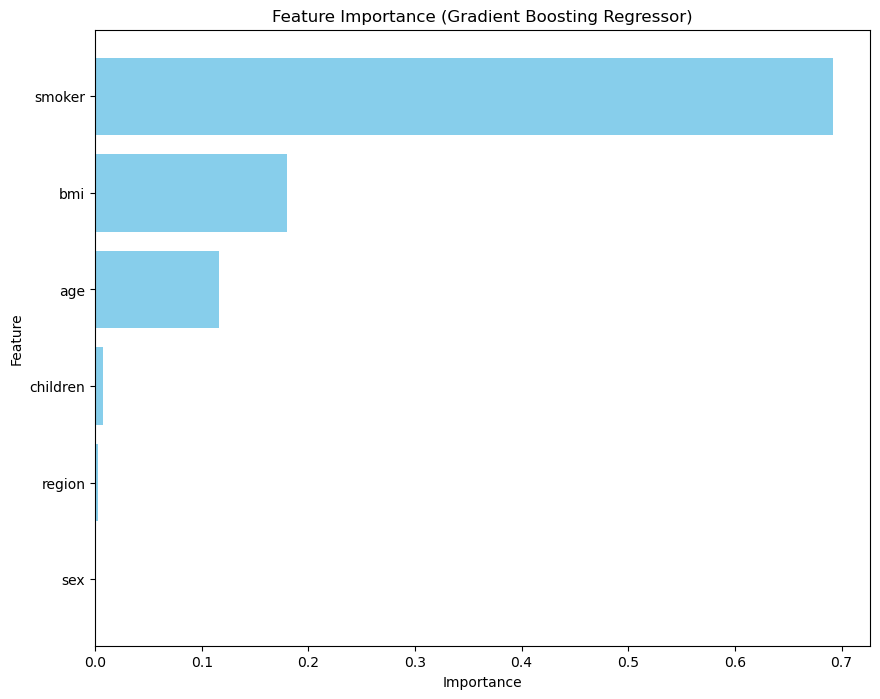

In [67]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_GB['Feature'], feature_importance_GB['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient Boosting Regressor)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

Feature Importance
Key factors driving healthcare costs include:

- Smoking Status: The most significant driver of higher charges.
- BMI: Particularly influential in conjunction with age and smoking, indicating health management programs could reduce costs.
- Age: Positively correlated with higher costs, underscoring the need for age-based preventive measures.

### 5. Conclusion
Our results futher affirm the hypothesis that smoking status, BMI, and age are major factors driving healthcare charges, with smoker status being the most critical. These insights provide clear guidance on the primary contributors to healthcare costs, which could inform strategies for cost management and preventive health measures in high-risk groups.

### 6. Deployment with Streamlit Web APP

### Build the Streamlit App
Here we Create a streamlit_app.py file for a Streamlit app, where users can input data, and the app will predict the insurance charges based on the model.

### 7. Next Steps
While the Gradient Boosting model provided accurate results, potential improvements include:

 - Data Enhancement: Additional features, such as income, lifestyle factors, or medical history, could yield more detailed insights into healthcare costs.
- Advanced Modeling: Testing more complex models like XGBoost or neural networks, could improve accuracy, particularly if new features are introduced.
- Model Reassessment: With additional data, revisiting the model may reveal new patterns or improve predictive power.

## Project Log

| Date (YYYY-MM-DD) || Project By    | Project Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2024-06-03        |      | Tolulope Israel | Aviva Insurance Data Analysis ~ Hypothesis Testing and Predictive Modeling |

<hr>

## <h3 align="center"> © Turing Corporation 2024. All rights reserved. <h3/>

<p>
